In [4]:
from pathlib import Path
from Datagen import train_test
import numpy as np
import time
# from Compile_the_data import train_test_for_pca
from Compile_the_data import dataset_for_classic
from Compile_the_data import train_test_for_pca_and_classic

from matplotlib import pyplot as plt
%matplotlib inline

#To do: Add clustarization to make prediction

In [5]:
from ensemble_model import ensemble_models

In [47]:
# paths = [
#     Path("img5_stripes/2/"),
#     Path("img5_stripes/3/"),
#     Path("img4_stripes/")
# ]

paths = [
#     Path("img9_stripes/1/"),
#     Path("img9_stripes/2/"),
    Path("img9_stripes/3/"),
    
    
]

In [48]:
def condition(a):
    # based on dataset inspection plots
    return (0.125 > a) & (a > 0.10)

In [49]:
params_net = {"max_size": 1,
              "min_size": 1,
              "min_features" : 0.5,
              "max_features" : 1,
              "max_epoches" : 300,
              "min_epoches" : 250,
              "Batches" : [5, 3],
              "lr" : [1e-3]
}

params_classic = {"max_size": 1,
                  "min_size": 0.5,
                  "h" : [ 0.0001, 0.0002]
}

params_tree = {"max_size": 1,
               "min_size": 0.5,
               "min_features" : 0.5,
               "max_features" : 1,
               "lr" : [1.01], 
               "max_depth" : [80, 100], 
               "n_estimators" : [100, 150, 50]
}



In [50]:
start = 0
end = 1
n_classics= 10
n_neural= 0
n_forests= 0

In [51]:
BATCH=5
N_COMPONENTS = 50
train_test_sp = train_test_for_pca_and_classic(paths, N_COMPONENTS, filtered = condition ) ## train_test(...) for average data


In [52]:
train_dataset, test_dataset = train_test_sp.get(test_size = 0.3)

In [53]:
train_target_classic = [train_dataset.target for i in range(len(train_dataset.inten))]
test_target_classic = [test_dataset.target for i in range(len(test_dataset.inten))]

train_classic = [train_target_classic, train_dataset.inten]
test_classic = [test_target_classic, test_dataset.inten]

In [185]:
ensemble = ensemble_models(n_classics= n_classics, n_neural= n_neural, n_forests= n_forests, 
                           params_net = params_net, params_classic = params_classic, 
                           params_tree = params_tree, start = start, end = end)

In [186]:
ensemble.fit(train_classic, train_dataset)

Starting classical fitting

Finished classical fitting:
 It took 0'18.



In [187]:
start_time = time.time()
prediction, pred = ensemble.predict(test_classic[1], test_dataset, method = "cluster")
end_time = time.time()

In [188]:
end_time - start_time

37.56730914115906

Text(0.5, 1.0, 'Ensemble: n_classics = 10, n_neural = 0, n_trees = 0')

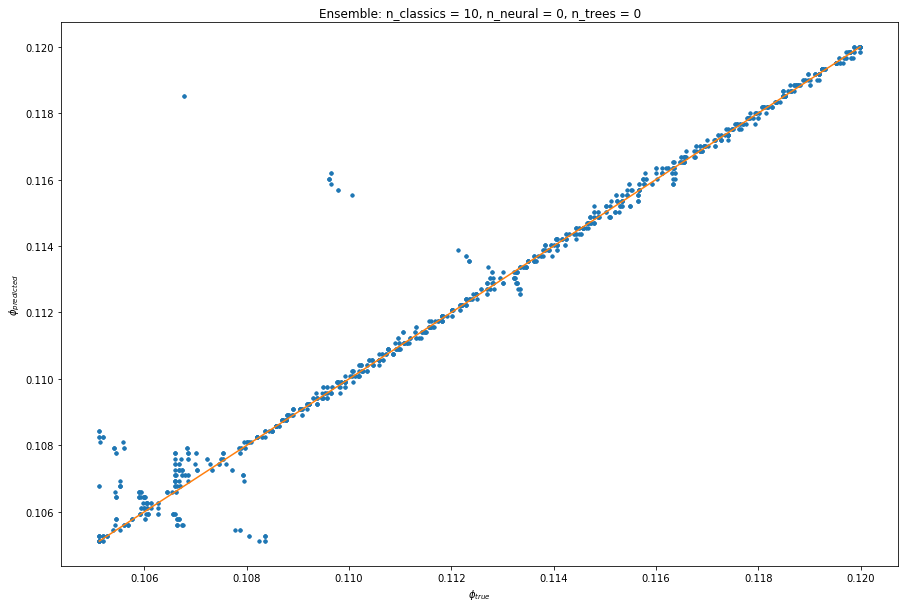

In [189]:
fig = plt.figure(figsize = (15, 10))
plt.plot(pred, test_dataset.target, '.')
plt.plot(test_dataset.target, test_dataset.target)
plt.xlabel("$\phi _{true}$")
plt.ylabel("$\phi _{predicted}$")
plt.title("Ensemble: n_classics = {}, n_neural = {}, n_trees = {}".format(n_classics, n_neural, n_forests))

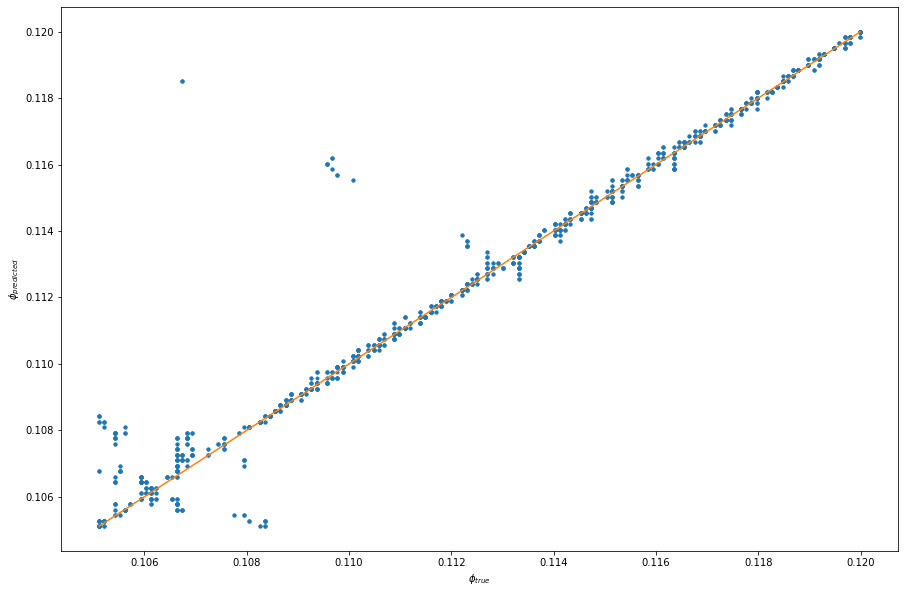

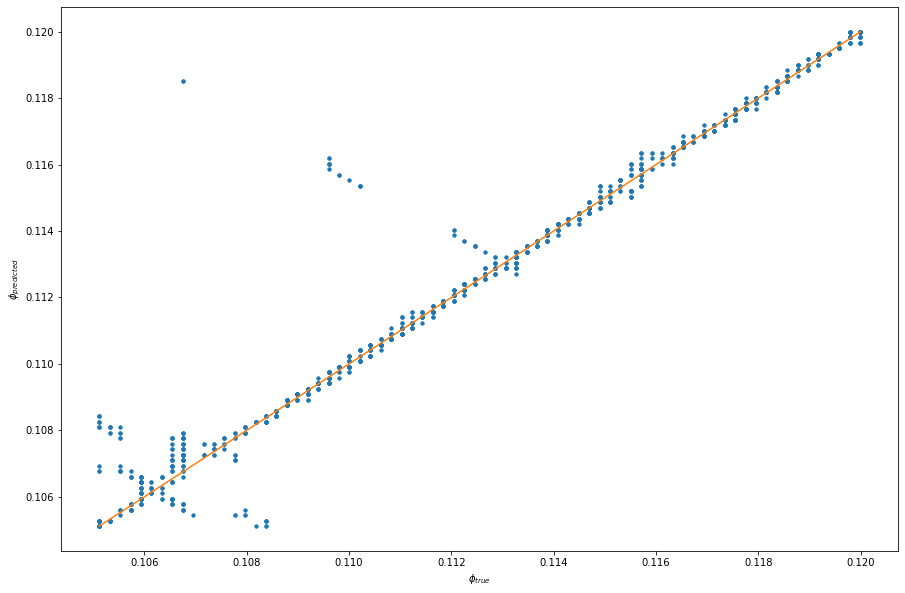

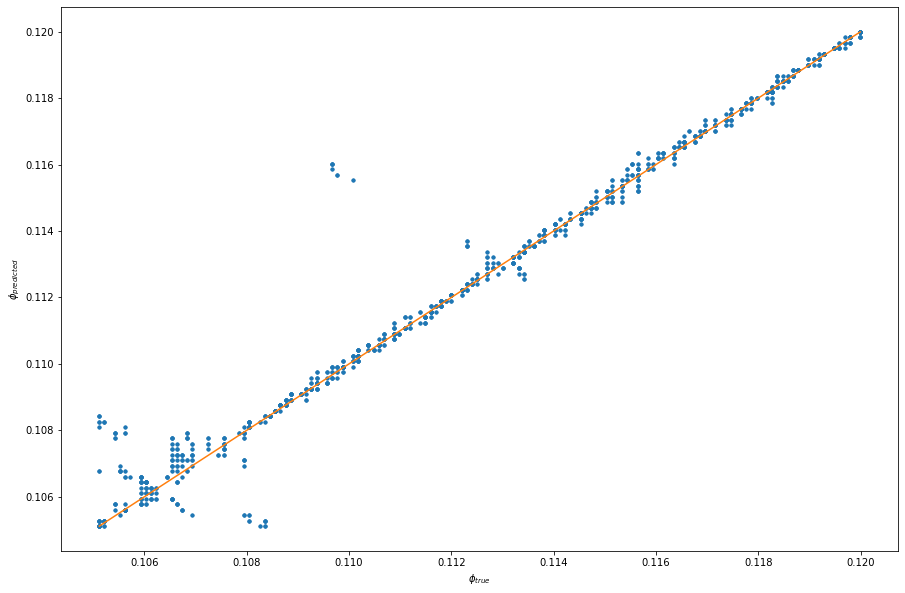

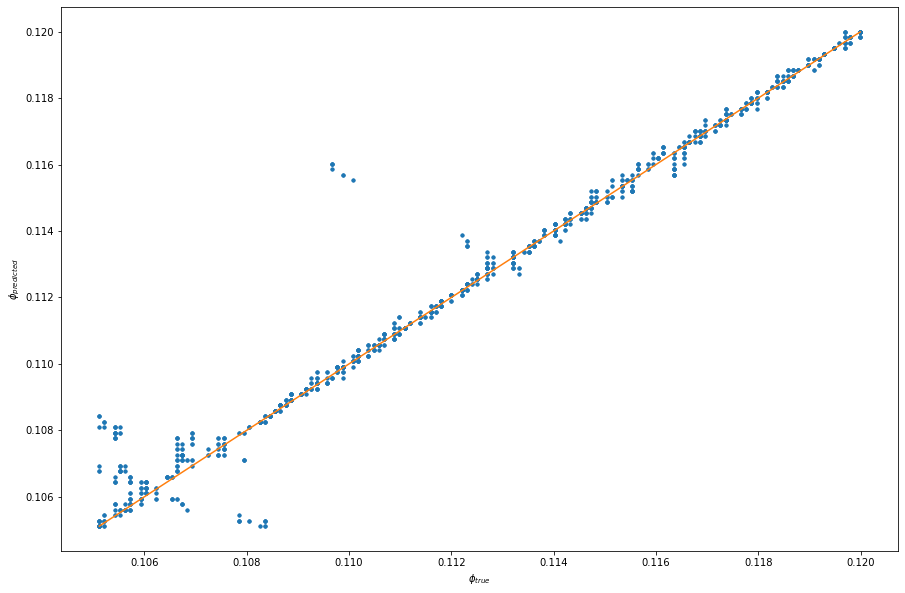

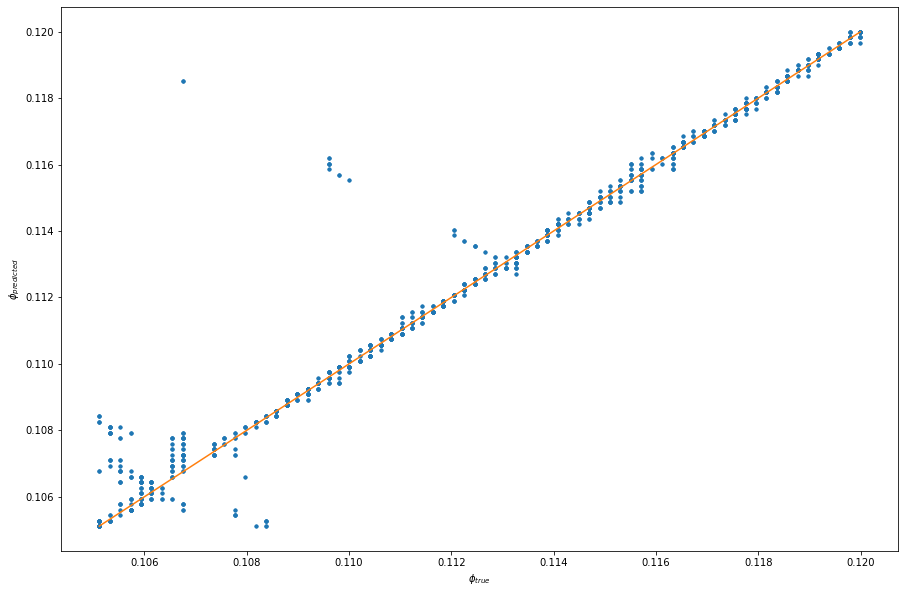

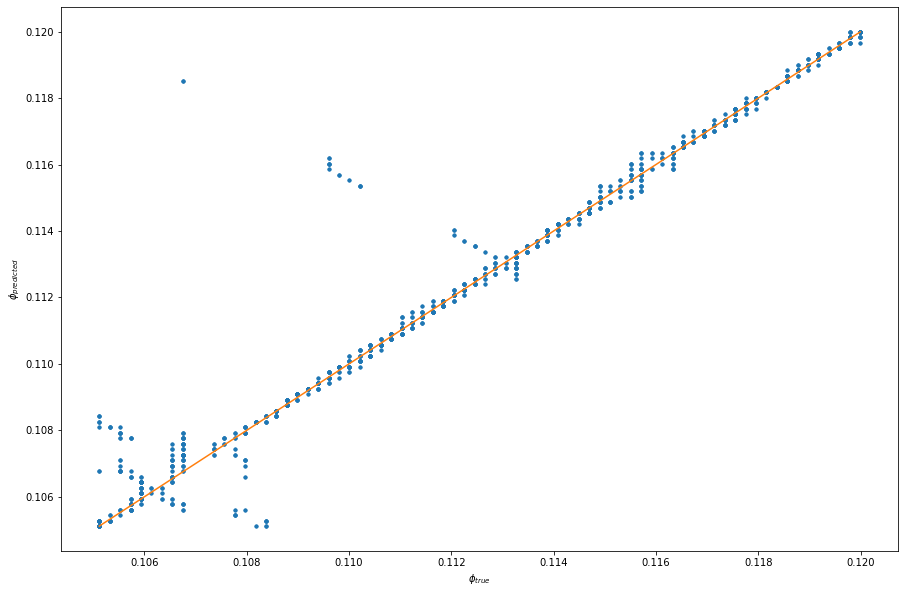

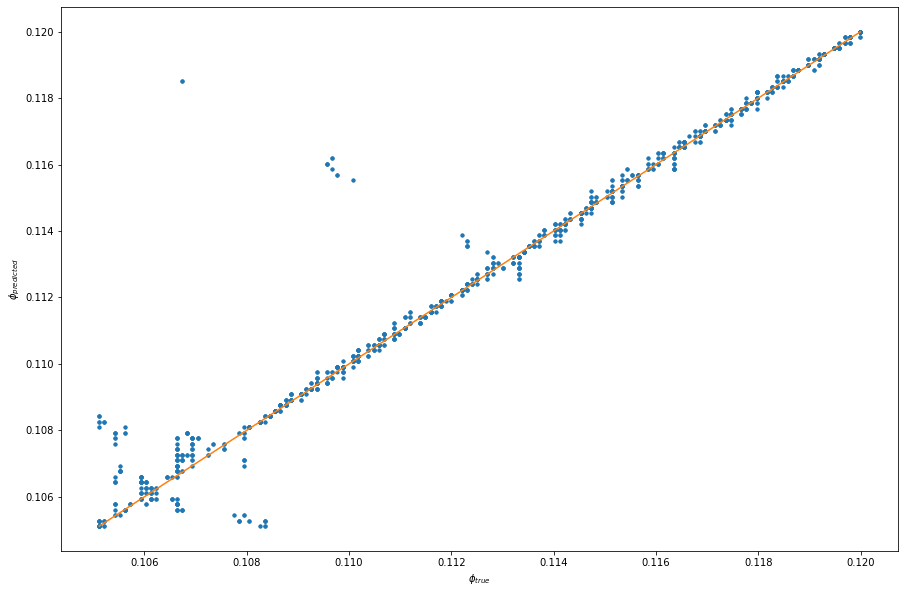

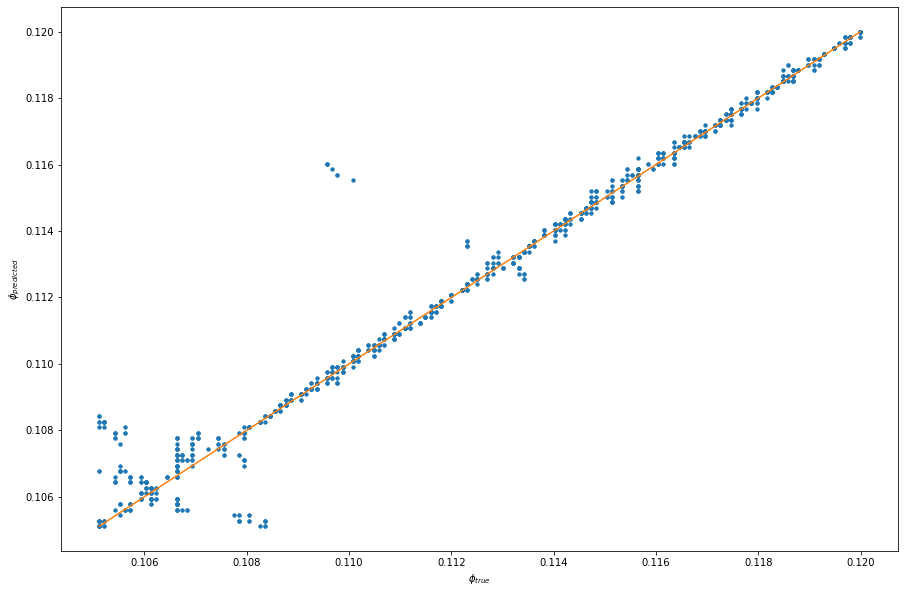

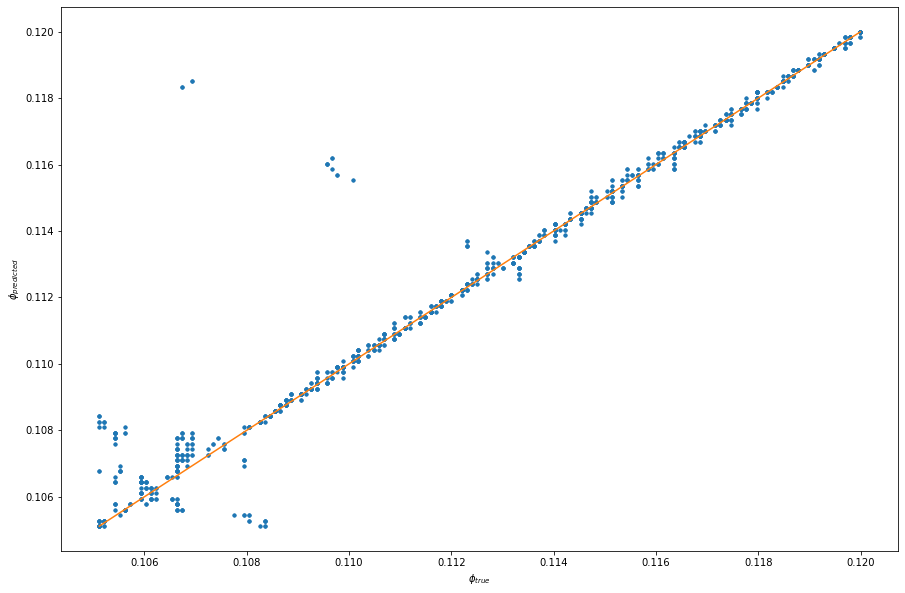

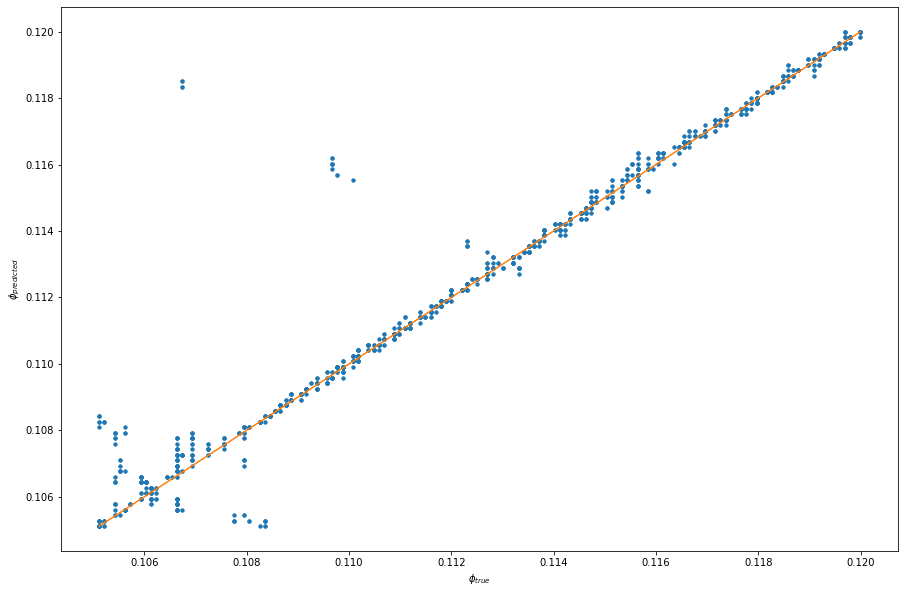

In [190]:
for i in range(len(prediction)):
    plt.figure(figsize = (15, 10))
    plt.plot(prediction[i], test_dataset.target, '.')
    plt.xlabel("$\phi _{true}$")
    plt.ylabel("$\phi _{predicted}$")
    plt.plot(test_dataset.target, test_dataset.target)
    plt.show()

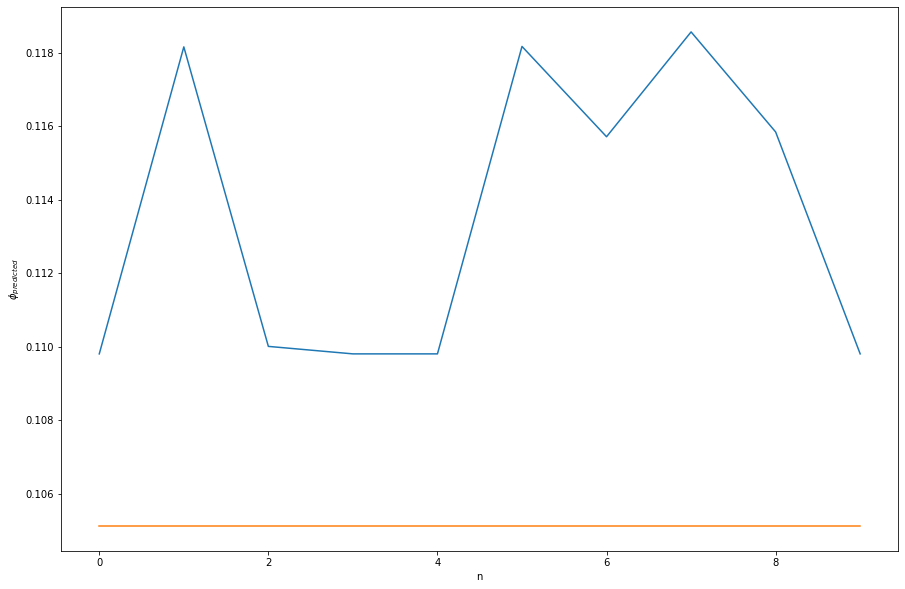

In [114]:
i = 2
predict = [prediction[j][i] for j in range(len(prediction))]

plt.figure(figsize = (15, 10))
plt.plot(predict)
plt.xlabel("n")
plt.ylabel("$\phi _{predicted}$")
plt.plot([test_dataset.target[i] for _ in range(len(predict))])
plt.show()
    



In [80]:
import numpy as np

In [81]:
np.corrcoef(pred, test_dataset.target)[0][1]

0.9174956580410825

In [82]:
(abs(pred-test_dataset.target)/test_dataset.target).max()

0.0982149776872552

In [83]:
(abs(pred-test_dataset.target)/test_dataset.target).mean()

0.004775708872350827

# Record:
cor = 0.99972

$\epsilon = 0.394 \%$

# Examine PCA


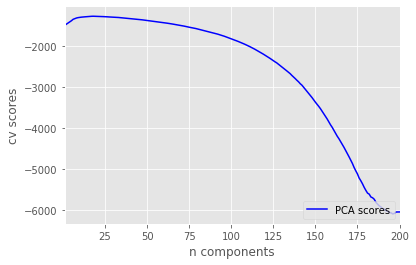

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    

        
data = train_dataset.images

D = len(data[0])

d_scores = []

for i in range(D):
    model = PCA(n_components=i+1)
    scores = cv_score(model, data, cv = 3)
    d_scores.append(scores.mean())
plot_scores(np.array(d_scores))

In [25]:
d_scores = np.array(d_scores)

In [26]:
np.where(d_scores == d_scores.max())

(array([17]),)

# Let's look at data

In [18]:
from fitting_data import gauss_est

In [19]:
model = gauss_est(0.0002)

In [20]:
model.fit(train_classic[0], train_classic[1])

In [21]:
pred, prob, probability  = model.predict(test_classic[1], probability= True)

Text(0.5, 1.0, 'Prediction for 0.11937864654422531 ')

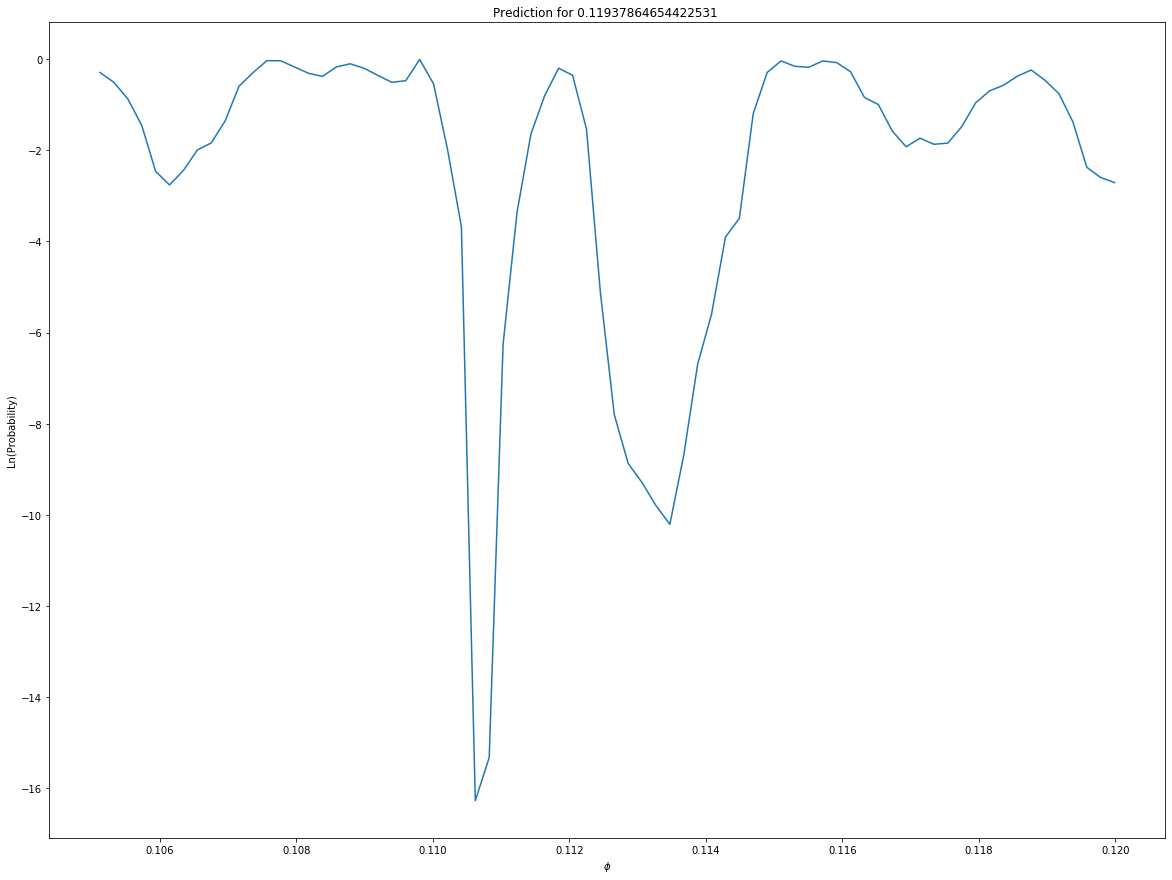

In [16]:
plt.figure(figsize = (20, 15))
plt.plot(model.phis, probability[100])
# plt.xlim((model.phis.min(), 0.108))
plt.xlabel("$\phi$")
plt.ylabel("Ln(Probability)")
plt.title("Prediction for {} ".format(pred[20]))

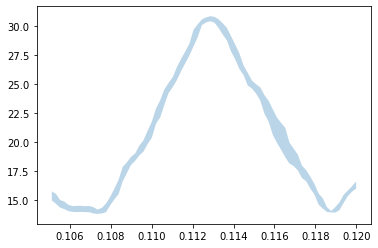

In [155]:
plt.fill_between(model.phis, model.mu[0]+model.sigma[0], model.mu[0]-model.sigma[0], alpha = 0.3)

Text(0, 0.5, 'Intensity')

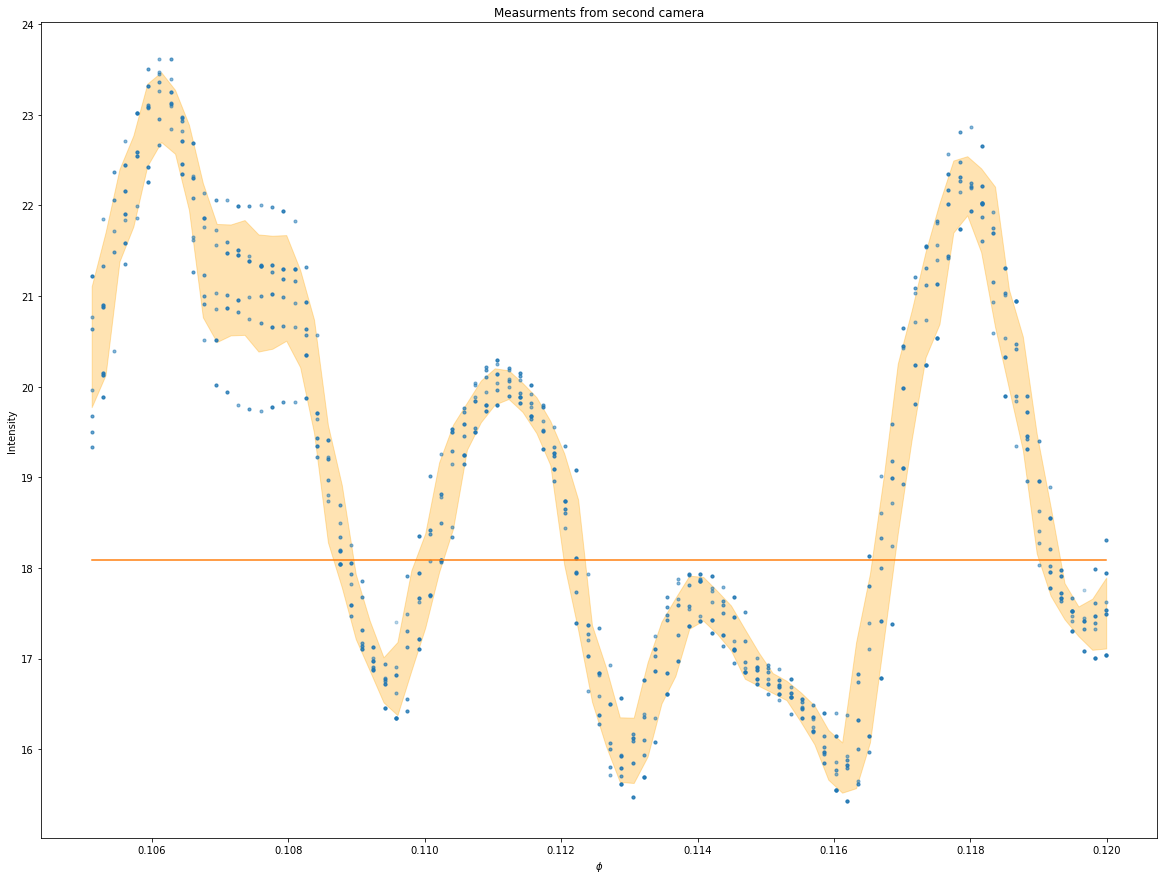

In [220]:

y = np.linspace(train_classic[1][1].min(), train_classic[1][1].max(), 21)
y_n = [test_classic[1][1][100] for i in range(len(model.phis))]


plt.figure(figsize = (20,15))
plt.title("Measurments from second camera")
plt.plot(train_classic[0][1] , train_classic[1][1], ".", alpha = 0.3)
plt.plot(model.phis, y_n)
# plt.fill_betweenx(y, model.phis[15],model.phis[15] -  model.h, alpha = 0.3)
plt.fill_between(model.phis, model.mu[1]+model.sigma[1], model.mu[1]-model.sigma[1], alpha = 0.3, color = 'orange')
plt.plot()
plt.xlabel("$\phi$")
plt.ylabel("Intensity")

Text(0, 0.5, 'Intensity')

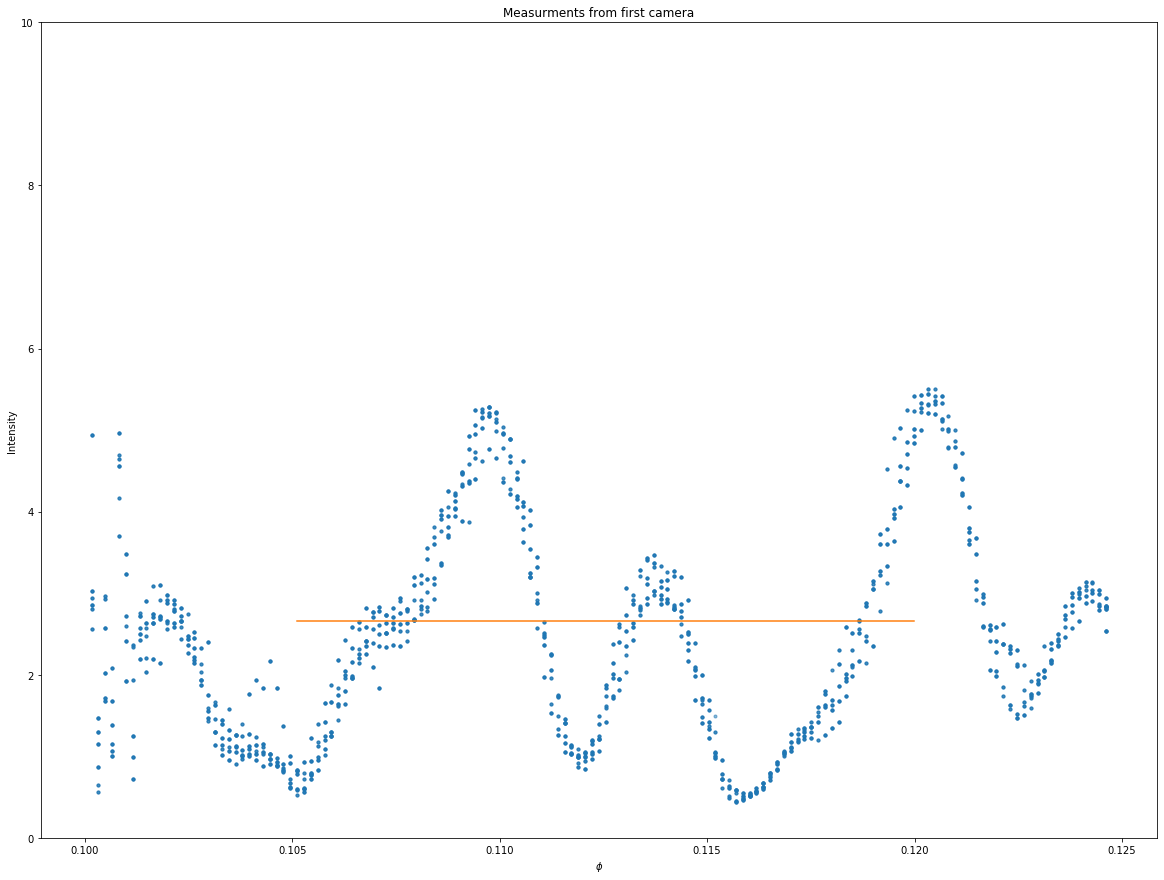

In [54]:
# plt.plot(ensemble.models[0].phis, ensemble.models[0].mu[0])
y = np.linspace(train_classic[1][0].min(), train_classic[1][0].max(), 21)
y_n = [test_classic[1][0][100] for i in range(len(model.phis))]
plt.figure(figsize = (20,15))

plt.plot(train_classic[0][0] , train_classic[1][0], ".", alpha = 0.3)
plt.plot(model.phis, y_n)
plt.title("Measurments from first camera")
# plt.fill_betweenx(y, model.phis[15],model.phis[15] -  model.h, alpha = 0.3)
# plt.fill_between(model.phis, model.mu[0]+model.sigma[0], model.mu[0]-model.sigma[0], alpha = 0.3, color = 'orange')
# plt.ylim((0, 10))
plt.xlabel("$\phi$")
plt.ylabel("Intensity")

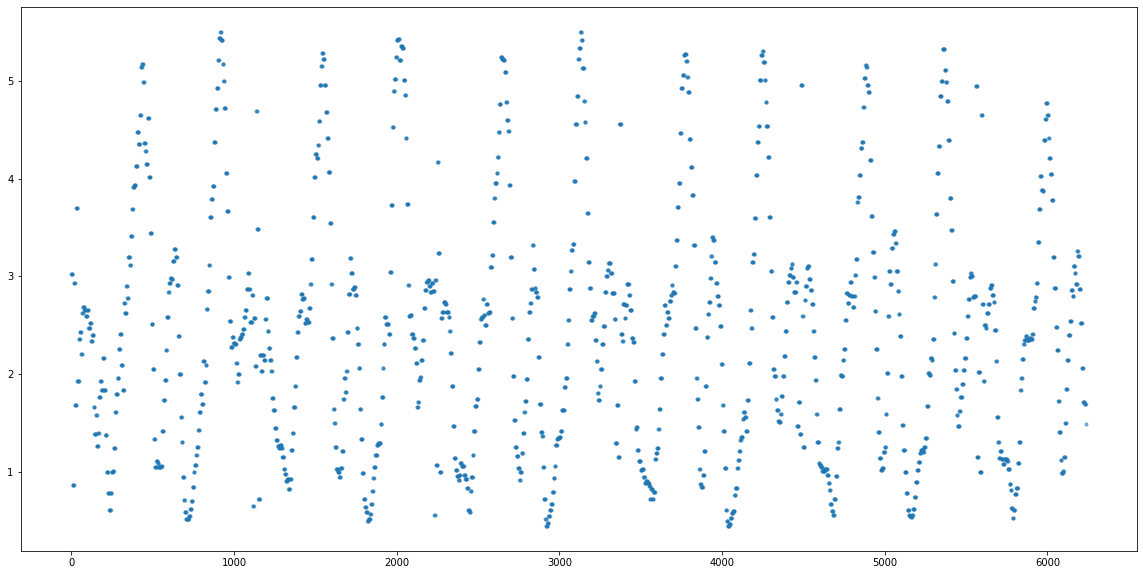

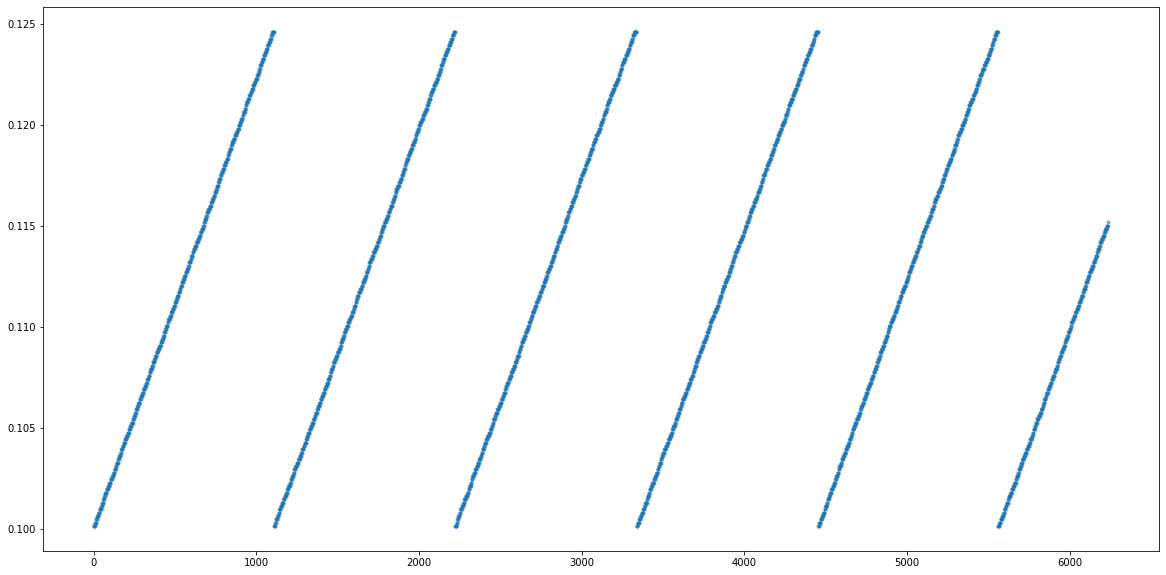

In [55]:
plt.figure(figsize = (20, 10))
plt.plot( train_classic[1][0], ".", alpha = 0.3)
plt.show()
plt.figure(figsize = (20, 10))
plt.plot(train_classic[0][0] ,".", alpha = 0.3)


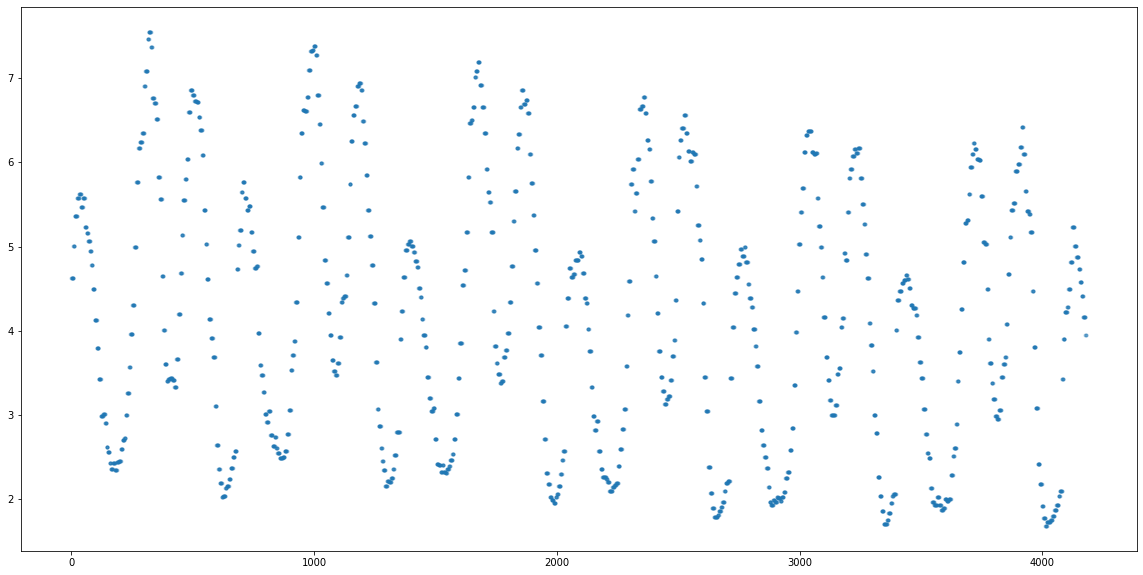

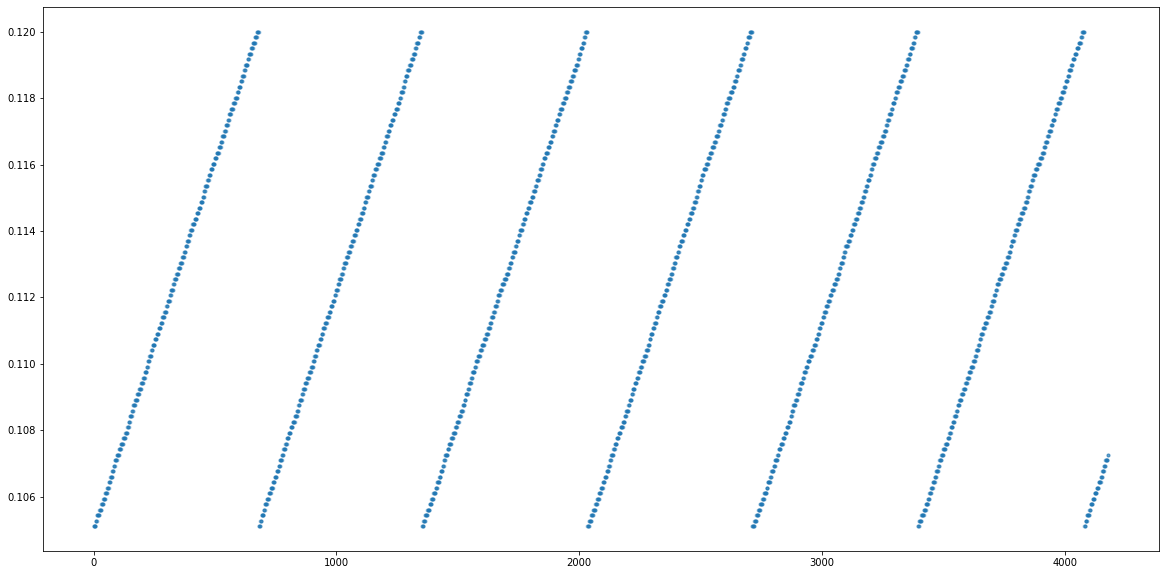

In [16]:
plt.figure(figsize = (20, 10))
plt.plot( train_classic[1][0], ".", alpha = 0.3)
plt.show()
plt.figure(figsize = (20, 10))
plt.plot(train_classic[0][0] ,".", alpha = 0.3)



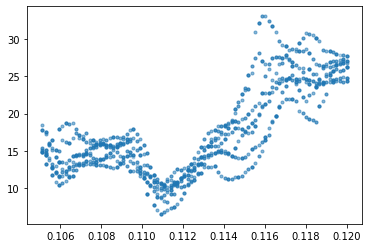

In [146]:
# plt.plot(ensemble.models[0].phis, ensemble.models[0].mu[2])
plt.plot(train_classic[0][2] , train_classic[1][2], ".", alpha = 0.3)
plt.fill_betweenx()

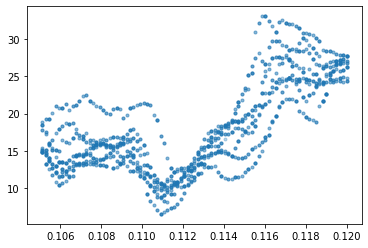

In [133]:
plt.plot(train_classic[0][3] , train_classic[1][3], ".", alpha = 0.3)

In [52]:
init = ((test_classic[0][1][idx] - prediction[7][idx])**2).mean()

In [53]:
init

2.091250203395213e-08

In [54]:
final = ((test_classic[0][0][idx] - pred[idx])**2).mean()

In [55]:
(init-final)/final

2.0488540620080657

In [60]:
final

6.859135140164281e-09

In [78]:
win = []
final = ((test_classic[0][1][idx] - pred[idx])**2).mean()
for item in prediction:
    init = ((test_classic[0][1][idx] - item[idx])**2).mean()
    win.append((init-final)/final)

In [79]:
np.array(win[:10]).mean()

451.5546632495087

In [46]:
win

[160.71169719804945,
 135.09326839656788,
 138.3446718757255,
 164.04301101659698,
 152.50480230995157,
 170.50605045510667,
 136.04696757613434,
 161.26724280399395,
 155.0432845124509,
 154.2989670927735,
 20.24271773224594,
 2.266994077414248,
 9.898724640403582,
 89.32909670233406,
 29.09822439233521,
 8.675346241926386,
 2.9649534413986847,
 108.55939189710766,
 7.182158254882586,
 8.736726878656697,
 8.179113856447417,
 54.244513352163096,
 15.932753349015073,
 24.81638994926236,
 31.382769479642093,
 26.52108982018466,
 29.48352843702466,
 73.28615288573248,
 82.05556312112559,
 19.77338049862872,
 14.958222287468312,
 51.75386117402547,
 72.79585337327885,
 34.82697345604268,
 46.61359821880268]

In [48]:
idx = np.linspace(0, len(test_classic[0][0]) - 1, len(test_classic[0][0]), dtype = int)

In [49]:
idx = idx[((prediction[7] < 0.112) &(prediction[7] > 0.110)) & ((test_classic[0][0] < 0.112) &(test_classic[0][0] > 0.110))]

In [50]:
phi = test_classic[0][0][idx]
correct = phi[idx]

IndexError: index 386 is out of bounds for axis 0 with size 185

In [51]:
idx

array([  95,   96,   97,   98,   99,  100,  101,  102,  103,  104,  105,
        106,  107,  108,  109,  110,  111,  112,  113,  114,  115,  116,
        117,  118,  119,  120,  121,  122,  123,  124,  125,  126,  127,
        128,  129,  130,  131,  132,  133,  386,  387,  388,  389,  390,
        391,  392,  393,  394,  395,  396,  397,  398,  399,  400,  401,
        402,  403,  404,  405,  406,  407,  408,  409,  410,  411,  412,
        413,  414,  415,  416,  417,  418,  419,  420,  679,  680,  681,
        682,  683,  684,  685,  686,  687,  688,  689,  690,  691,  692,
        693,  694,  695,  696,  697,  698,  699,  700,  701,  702,  703,
        704,  705,  706,  707,  708,  709,  710,  711,  712,  713,  714,
        715,  716,  966,  967,  968,  969,  970,  971,  972,  973,  974,
        975,  976,  977,  978,  979,  980,  981,  982,  983,  984,  985,
        986,  987,  988,  989,  990,  991,  992,  993,  994,  995,  996,
        997,  998,  999, 1000, 1001, 1002, 1003, 12

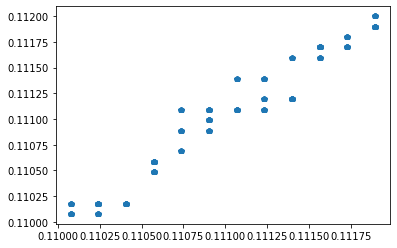

In [110]:
plt.plot(test_classic[0][1][idx], prediction[7][idx], "p")